In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras

In [26]:
import urllib

data_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = os.path.join('data', 'cats-and-dogs-filtered.zip')

if not os.path.exists(zip_dir):
    reponse = urllib.request.urlretrieve(data_url, zip_dir)

In [27]:
import zipfile

data_dir = os.path.join('data', 'cats-and-dogs-filtered')

if not os.path.isdir(data_dir):
    with zipfile.ZipFile(zip_dir) as file:
        file.extractall(os.path.join('data'))
    os.rename(os.path.join('data', 'cats_and_dogs_filtered'), data_dir)

In [4]:
print('Content of base directory:')
print(os.listdir(data_dir))

print('Content of train directory:')
print(os.listdir(os.path.join(data_dir, 'train')))

print('Content of validation directory:')
print(os.listdir(os.path.join(data_dir, 'validation')))

Content of base directory:
['train', 'validation', 'vectorize.py']
Content of train directory:
['cats', 'dogs']
Content of validation directory:
['cats', 'dogs']


In [5]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

train_cat_dir = os.path.join(data_dir, 'train', 'cats')
train_dog_dir = os.path.join(data_dir, 'train', 'dogs')

val_cat_dir = os.path.join(data_dir, 'validation', 'cats')
val_dog_dir = os.path.join(data_dir, 'validation', 'dogs')

In [6]:
print(os.listdir(train_cat_dir)[:10])
print(os.listdir(train_dog_dir)[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [7]:
print('There are', len(os.listdir(train_cat_dir)), 'cat images for training.')
print('There are', len(os.listdir(train_dog_dir)), 'dog images for training.')
print('There are', len(os.listdir(val_cat_dir)), 'cat images for validation.')
print('There are', len(os.listdir(val_dog_dir)), 'dog images for validation.')

There are 1000 cat images for training.
There are 1000 dog images for training.
There are 500 cat images for validation.
There are 500 dog images for validation.


In [8]:
def show_cats_dogs(start_i=0, cat_dir=train_cat_dir, dog_dir=train_dog_dir, nrow=4, ncol=4):
    nrow = nrow + 1 if nrow % 2 == 1 else nrow
    nimg = (nrow // 2) * ncol
    
    cat_imgs = [os.path.join(cat_dir, file)
                for file in os.listdir(cat_dir)[start_i : start_i+nimg]]
    dog_imgs = [os.path.join(dog_dir, file)
                for file in os.listdir(dog_dir)[start_i : start_i+nimg]]
    
    fig, axs = plt.subplots(nrow, ncol, figsize=(ncol*4, ncol*4))
    
    for ax, file in zip(axs.flatten(), cat_imgs + dog_imgs):
        img = plt.imread(file)
        ax.imshow(img)
        ax.axis('off')

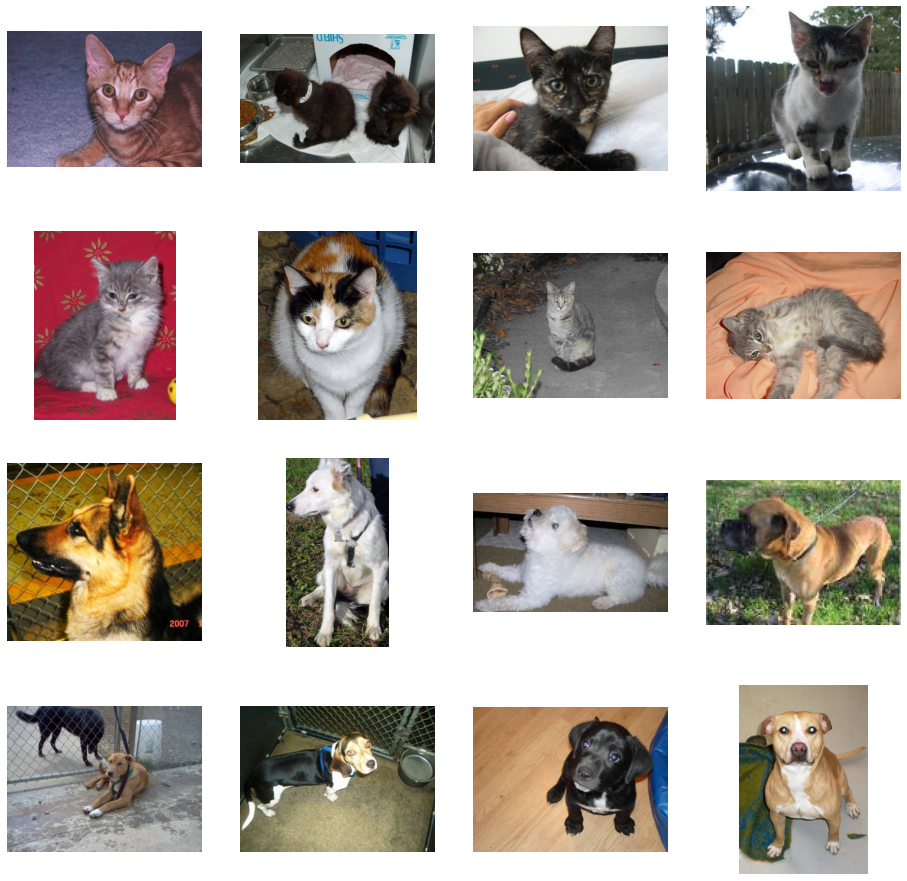

In [9]:
show_cats_dogs(10)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

catdog_gen = ImageDataGenerator(rescale=1/255)
train_data = catdog_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
val_data = catdog_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [15]:
%%time

history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data,
)

Epoch 1/15
100/100 [==============================] - 15s 99ms/step - loss: 0.7849 - accuracy: 0.5695 - val_loss: 0.6565 - val_accuracy: 0.6090
Epoch 2/15
100/100 [==============================] - 4s 39ms/step - loss: 0.6463 - accuracy: 0.6575 - val_loss: 0.6993 - val_accuracy: 0.6060
Epoch 3/15
100/100 [==============================] - 4s 38ms/step - loss: 0.5675 - accuracy: 0.7115 - val_loss: 0.5576 - val_accuracy: 0.7200
Epoch 4/15
100/100 [==============================] - 4s 37ms/step - loss: 0.4775 - accuracy: 0.7785 - val_loss: 0.5956 - val_accuracy: 0.7060
Epoch 5/15
100/100 [==============================] - 4s 38ms/step - loss: 0.3923 - accuracy: 0.8185 - val_loss: 0.6127 - val_accuracy: 0.7140
Epoch 6/15
100/100 [==============================] - 4s 37ms/step - loss: 0.3013 - accuracy: 0.8705 - val_loss: 0.6118 - val_accuracy: 0.7110
Epoch 7/15
100/100 [==============================] - 4s 37ms/step - loss: 0.2050 - accuracy: 0.9145 - val_loss: 0.7813 - val_accuracy: 0.709

In [13]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4215197756540023618
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22681944064
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18249663887097486461
 physical_device_desc: "device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [17]:
import utilities

from importlib import reload
reload(utilities)

<module 'utilities' from 'D:\\code\\python\\coursera-tensorflow-cert\\utilities.py'>

1/1 [==============================] - 0s 16ms/step


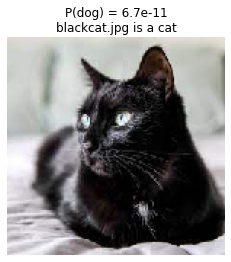

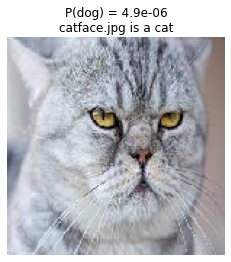

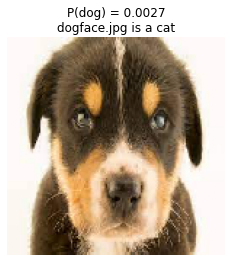

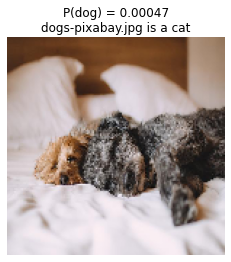

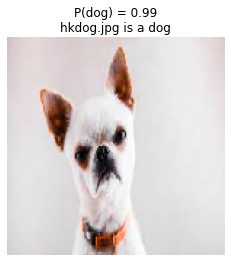

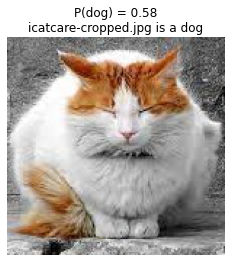

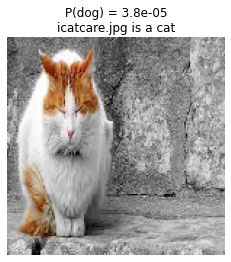

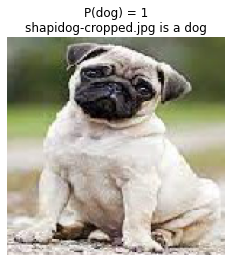

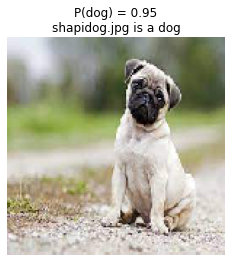

In [19]:
test_dir = os.path.join('data', 'cats-and-dogs-test')
utilities.pred_binary_dir(model, test_dir, cat0='cat', cat1='dog')

In [20]:
view_layers = utilities.get_layers_viewer(model, cat0='cat', cat1='dog', img_dir=test_dir)

1/1 [==============================] - 0s 47ms/step


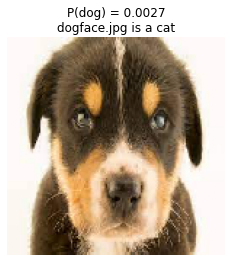

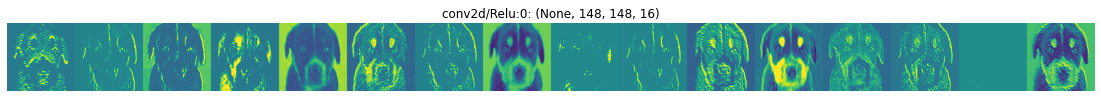

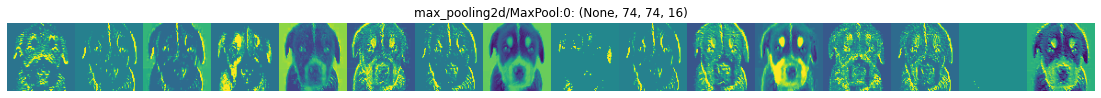

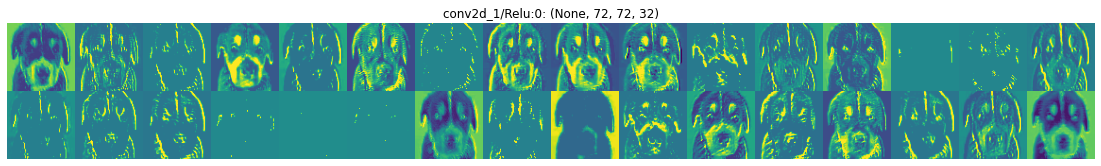

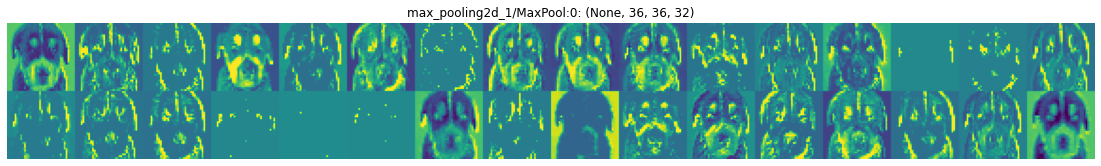

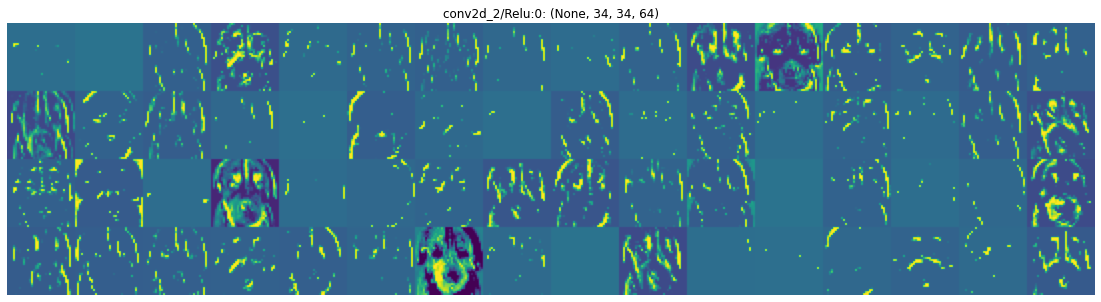

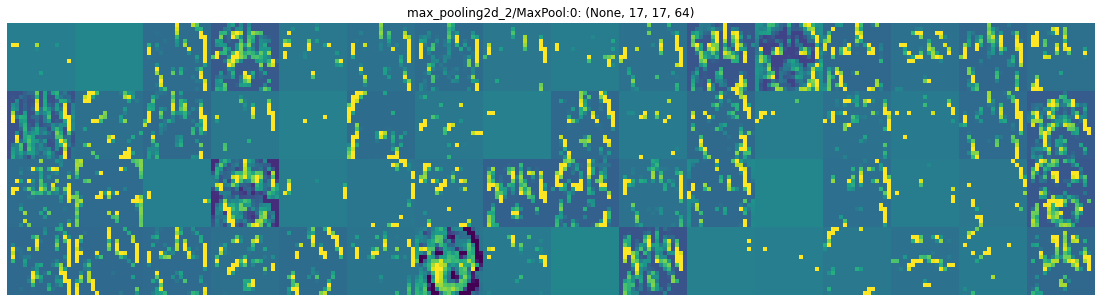

In [21]:
view_layers('dogface.jpg')

1/1 [==============================] - 0s 0s/step


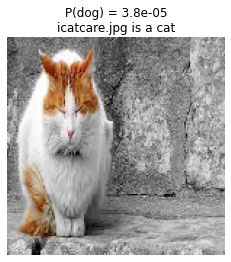

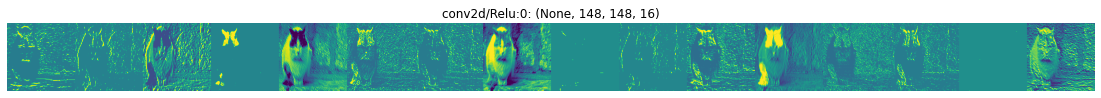

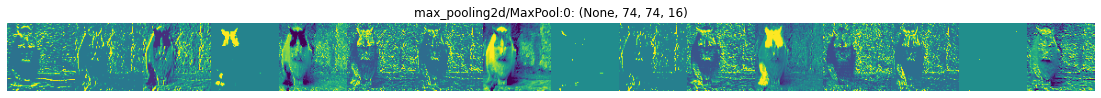

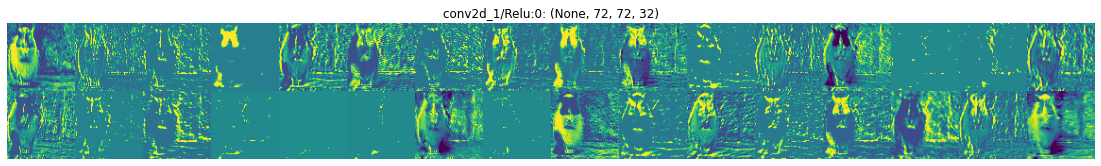

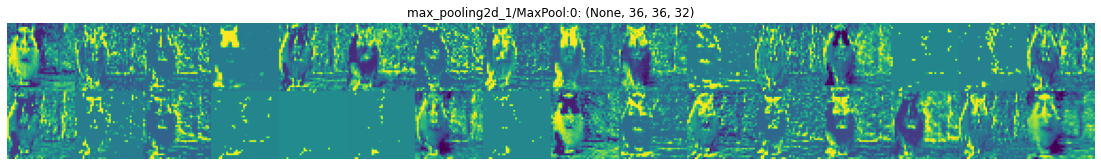

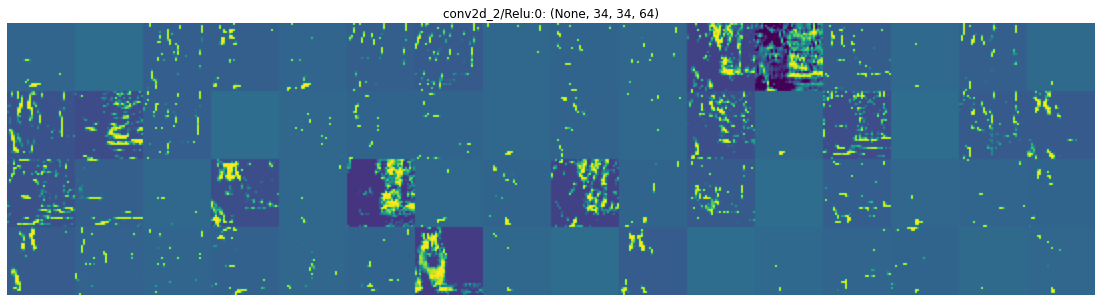

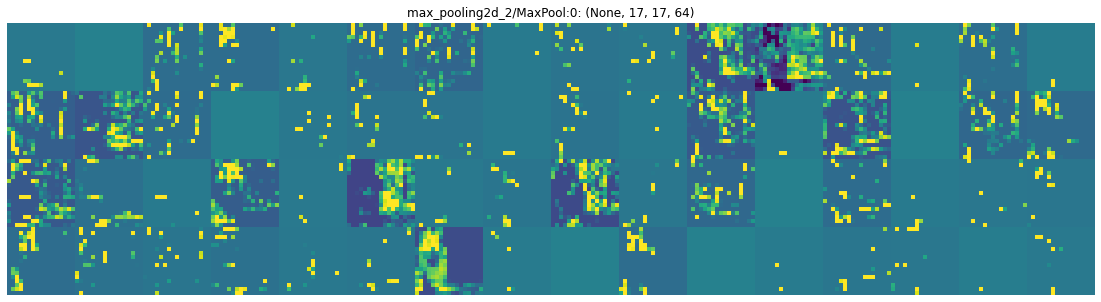

In [22]:
view_layers('icatcare.jpg')

1/1 [==============================] - 0s 16ms/step


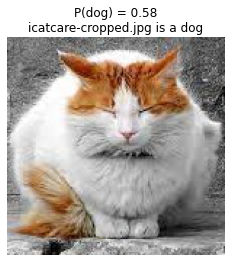

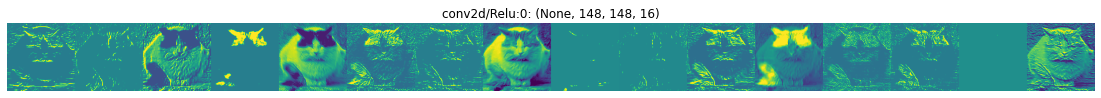

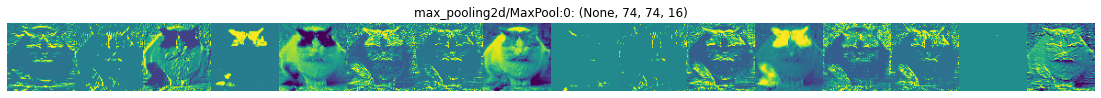

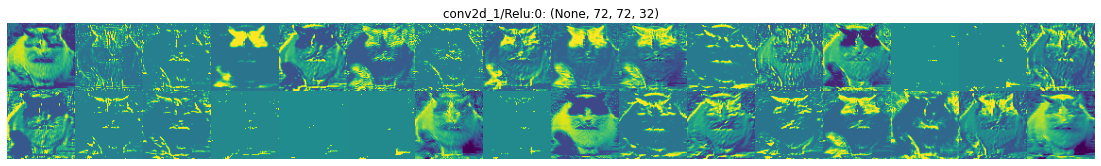

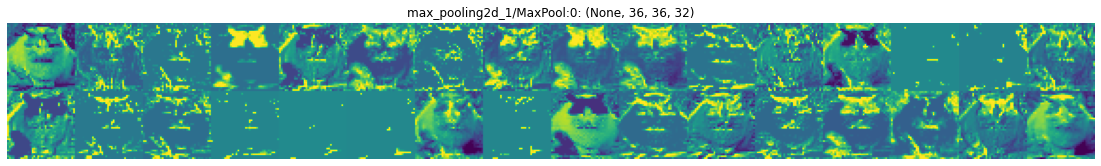

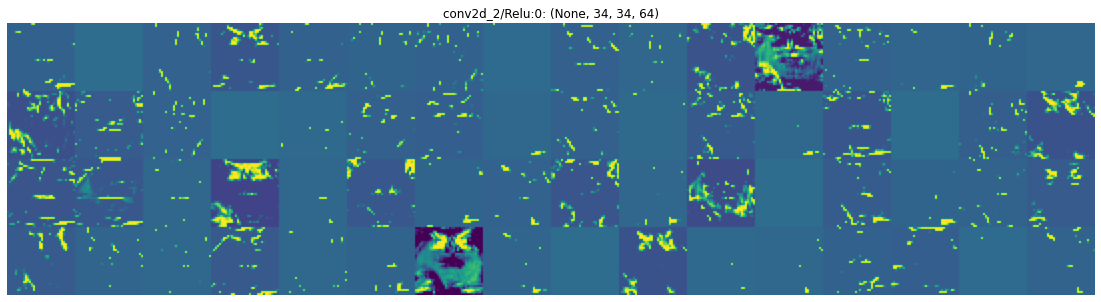

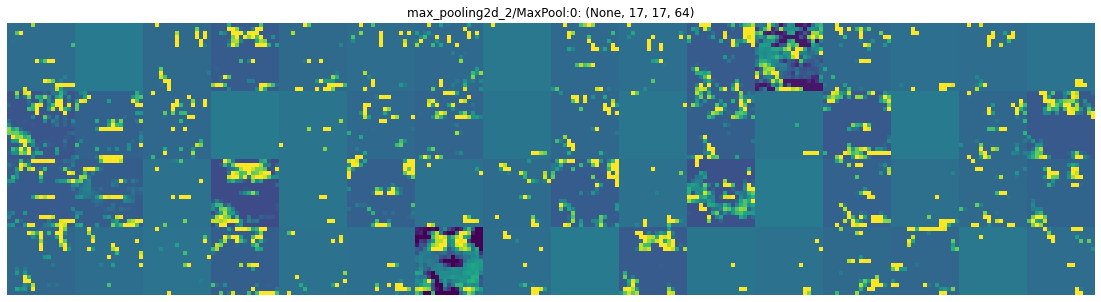

In [23]:
view_layers('icatcare-cropped.jpg')

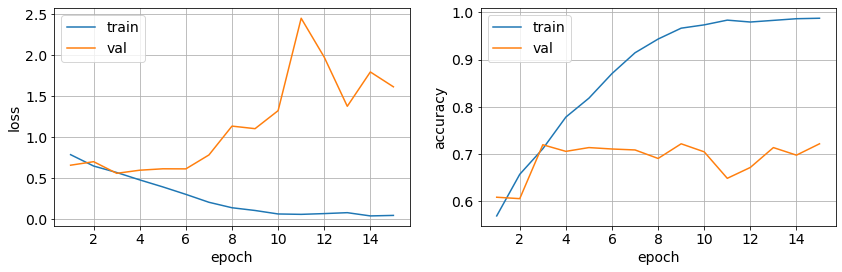

In [24]:
utilities.plot_train_val_metrics(history, ('loss','accuracy'))